# Number of Features

### Introduction

### Using the California DataSet

In [1]:
from sklearn.datasets import california_housing
dataset = california_housing.fetch_california_housing()

dataset.keys()

data = california_housing.fetch_california_housing()
X = data['data']
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

### Exploring different levels

Because we have eight features with this dataset, in the code below we perform RFE with eight features, then seven, then six, down to one.  And at each level, we store the accuracy score we achieved with this number.  Ok here's the code.

In [2]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

selectors = []

for idx in list(range(1, 8, 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    # 3. reduce the dataset to the number of features
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    
    # 4. compute the accuracy score and append to the list
    estimator.fit(X_train_rfe,y_train)
    score = estimator.score(X_test_rfe,y_test)
    selectors.append(np.array([rfe, score, idx]))

In [6]:
wrapped_selectors = np.array(selectors)

In [8]:
y_values = wrapped_selectors[:, 1]
x_values = wrapped_selectors[:, -1]

In [9]:
x_values

array([7, 6, 5, 4, 3, 2, 1], dtype=object)

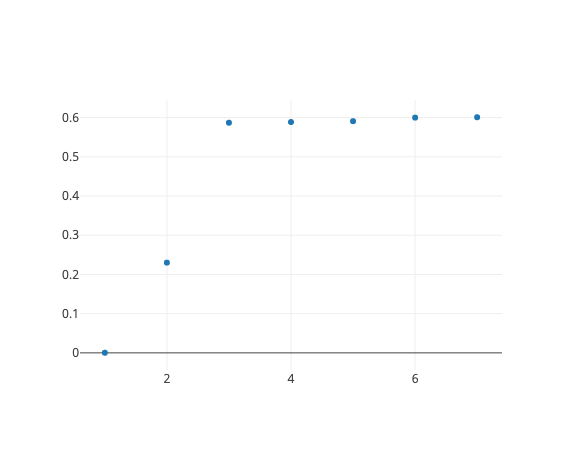

In [11]:
from graph import trace_values, plot
trace = trace_values(x_values, y_values)
plot([trace])

### Choosing the correct number

In [12]:
top_selector = selectors[-3]
top_selector

array([RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
  n_features_to_select=3, step=1, verbose=0),
       0.5870241539174605, 3], dtype=object)

In [13]:
top_rfe = top_selector[0]
np.array(dataset['feature_names'])[top_rfe.support_]

array(['MedInc', 'Latitude', 'Longitude'], dtype='<U10')

### A question of efficiency

```python
selectors = []

for idx in list(range(1, 8, 1))[::-1]:
    estimator = LinearRegression(n_jobs=-1)
    rfe = RFE(estimator, idx, step=1)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    
    estimator.fit(X_train_rfe,y_train)
    score = estimator.score(X_test_rfe,y_test)
    selectors.append(np.array([rfe, score, idx]))
```

In [5]:
from sklearn.feature_selection import RFECV

Now `RFECV` stands for recursive feature engineering with cross validation.  We'll explain cross validation below, but for now just recognize that the below code will also perform RFE at each level.

In [14]:
from sklearn.feature_selection import RFECV

estimator = LinearRegression(n_jobs=-1)
rfe = RFECV(estimator, step=1, cv=5)
X_train_rfe = rfe.fit_transform(X_train,y_train)




In [15]:
rfecv_scores = rfe.grid_scores_
rfecv_scores

array([0.00261726, 0.2480132 , 0.58221634, 0.58742058, 0.59472698,
       0.60447671, 0.60547401, 0.60542133])

In [16]:
from graph import plot, trace_values
trace_rfecv = trace_values(num_features, rfecv_scores)
plot([trace])

NameError: name 'num_features' is not defined

### Explaining cross validation